# Perceptron
A perceptron receives several input and gives one output. 

The input can vary in a range, but the output can only be 0 and 1.

The model of a perceptron with 2 inputs:
$$
\begin{align*}
    y = 
    \begin{cases}
        0 &(w_1x_1 + w_2x_2 < \theta)\\
        1 &(w_1x_1 + w_2x_2 \ge \theta)
    \end{cases}
\end{align*}
$$

## Implement the Perceptron
### First Examples
Perceptrons can output 0 or 1 according to input, just like the gates.

So let's use perceptron to implement and AND gate

In [56]:
# and-gate

def AND(x1, x2) :
    w1 = 1
    w2 = 1
    limit = 1.5
    weighted_sum = w1 * x1 + w2 * x2
    if weighted_sum < limit:
        return 0
    else :
        return 1
    
print(f"1 & 1 is {AND(1, 1)}")
print(f"1 & 0 is {AND(1, 0)}")
print(f"0 & 0 is {AND(0, 0)}")

1 & 1 is 1
1 & 0 is 0
0 & 0 is 0


### Import Offset and  Weight
Again show the model of a perceptron, but in different form. Now the model has an offset and the right side of the comparison is 0
$$
\begin{align*}
    y = 
    \begin{cases}
        0 & (b + w_1x_1 + w_2x_2 \le 0)\\
        1 & (b + w_1x_1 + w_2x_2 > 0)
    \end{cases}
\end{align*}
$$

$b$ is the bias and $w_i$ is weight

And now I will use `numpy` to implement the perceptron.

In [57]:
# OR gate
import numpy as np

def myOr(input) :
    weight = np.array([1, 1])
    ndinput = np.array(input)
    offset = -0.5
    result = offset + np.sum(weight * ndinput)
    if result < 0: return 0
    else : return 1

print(f"0 or 0 is {myOr([0, 0])}")
print(f"1 or 0 is {myOr([1, 0])}")
print(f"1 or 1 is {myOr([1, 1])}")

def myAnd(input) :
    weight = np.array([1, 1])
    ndinput = np.array(input)
    offset = -1.5
    result = offset + np.sum(weight * ndinput)
    if result < 0 : return 0
    else : return 1

0 or 0 is 0
1 or 0 is 1
1 or 1 is 1


It should be mentioned that the meaning of offset is different from the meaning of weight
* Weight controls the importance of the import
* Offset controls how easy the neurons can be stimulated

## Limitation of Perceptrons
In the AI101, I have said that the perceptron can only devide the plain into 2 parts. 

After giving the method to construct AND, OR and NAND. I will claim that the perceptron can never function as a XOR gate.

Firstly I will use the plot to show the math form of the OR perceptron.

The divide line is: $x + y - 0.5 = 0$, deduct into $y = 0.5 - x$

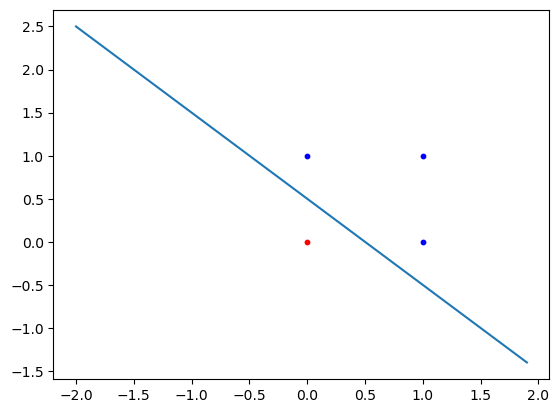

In [58]:
import matplotlib.pyplot as plot

x = np.arange(-2, 2, 0.1)
y = 0.5 - x
plot.plot(x, y)
plot.scatter([0], [0], s = 10, c = 'r')
plot.scatter([1], [0], s = 10, c = 'b')
plot.scatter([0], [1], s = 10, c = 'b')
plot.scatter([1], [1], s = 10, c = 'b')
plot.show()

We can see that the essense of the perceptron is to divide the different points into 2 group

*This kind of points should be able to divided with a straight line*; if not, the perceptron cannot handle.

For example the XOR situation will be showed with plot:

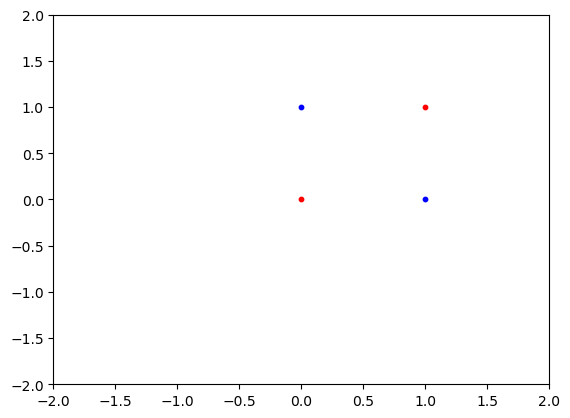

In [59]:
plot.xlim(left = -2, right = 2)
plot.ylim(bottom = -2, top = 2)
plot.scatter(0, 0, s = 10, c = 'r')
plot.scatter(1, 1, s = 10, c = 'r')
plot.scatter(0, 1, s = 10, c = 'b')
plot.scatter(1, 0, s = 10, c = 'b')
plot.plot()
plot.show()

We can easily see that the points in different colors will never be able to divided into 2 groups with only 1 straight line.

But if we are able to use the curves, the problem will be solved.

So let us introduce Multi-Layer Perceptron.

## Multi-Layer Perceptron
How to build an XOR with AND, OR, NAND?

With the knowledge of the logic circuit, `a ^ b = (a & ~b) | (~a & b)`

Let us implement the XOR with the gates created before

In [60]:
def XOR(input) :
    input1 = np.array(input)
    input2 = np.array(input)
    if input1[0] == 0 : input1[0] = 1
    else : input1[0] = 0
    if input2[1] == 0 : input2[1] = 1
    else : input2[1] = 0
    x1 = myAnd(input1)
    x2 = myAnd(input2)
    input3 = [x1, x2]
    return myOr(input3)

print(f"0 xor 0 is {XOR([0, 0])}")
print(f"1 xor 1 is {XOR([1, 1])}")
print(f"1 xor 0 is {XOR([1, 0])}")

0 xor 0 is 0
1 xor 1 is 0
1 xor 0 is 1


The result is what we expect as a XOR. And this is a 2-layer perceptron.

This showes that a multi-layer perceptron is more powerful than a single-layer perceptron.

Actually, this showes that a multi-layer perceptron is as powerful as a computer CPU, which is composed with gates.

*When we say 2-layer perceptron, 2-layer means 2 layer of weight*